In [7]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('dataset/lena.jpg')
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height = grayImage.shape[0]
width = grayImage.shape[1]

In [9]:
def dpcm(y_buffer, d_buffer, re_buffer, width, height, bit_num):
    # y_buffer raw buffer
    # d_buffer delta buffer
    # re_buffer reconstruct buffer
    delta = 2 ** (8 - bit_num)
    delta_2 = 2 ** (9 - bit_num)
    flow_upper_bound = 2 ** bit_num - 1
    for i in range(0, height):
        prediction = 128
        pred_error = y_buffer[i * width] - prediction
        temp = (pred_error + 128) // delta
        d_buffer[i * width] = temp
        inv_pred_error = d_buffer[i * width] * delta - 128
        re_buffer[i * width] = inv_pred_error + prediction
        for j in range(1, width):
            prediction = re_buffer[i * width + j - 1]
            predErr = y_buffer[i * width + j] - prediction
            temp = (predErr + 255) // delta_2
            d_buffer[i * width + j] = temp
            invPredErr = d_buffer[i * width + j] * delta_2 - 255
            re_buffer[i * width + j] = invPredErr + prediction

#### 一位量化器

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15148\705373790.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = y_buffer[i * width + j] - prediction


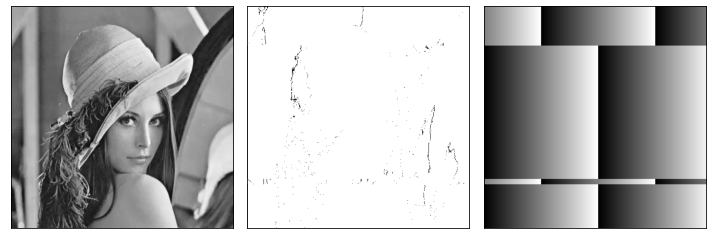

In [10]:
y_buffer = np.zeros((height * width), dtype=np.uint8)
y_buffer = grayImage.reshape(height * width)
d_buffer = np.zeros((height * width), dtype=np.uint8)
re_buffer = np.zeros((height * width), dtype=np.uint8)
dpcm(y_buffer, d_buffer, re_buffer, width, height, 1)
d_buffer = d_buffer.reshape(height, width)
re_buffer = re_buffer.reshape(height, width)

plt.figure(figsize=(10, 12))
plt.subplot(131), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(d_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(re_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#### 两位量化器

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15148\705373790.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = y_buffer[i * width + j] - prediction


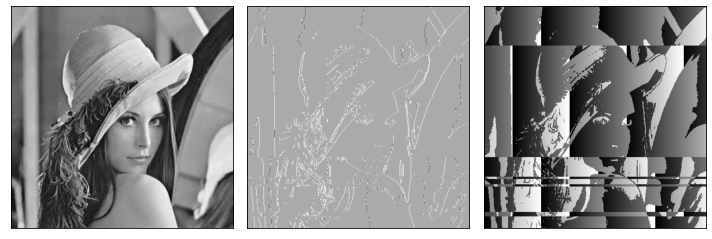

In [11]:
y_buffer = np.zeros((height * width), dtype=np.uint8)
y_buffer = grayImage.reshape(height * width)
d_buffer = np.zeros((height * width), dtype=np.uint8)
re_buffer = np.zeros((height * width), dtype=np.uint8)
dpcm(y_buffer, d_buffer, re_buffer, width, height, 2)
d_buffer = d_buffer.reshape(height, width)
re_buffer = re_buffer.reshape(height, width)

plt.figure(figsize=(10, 12))
plt.subplot(131), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(d_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(re_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#### 四位量化器

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15148\705373790.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = y_buffer[i * width + j] - prediction


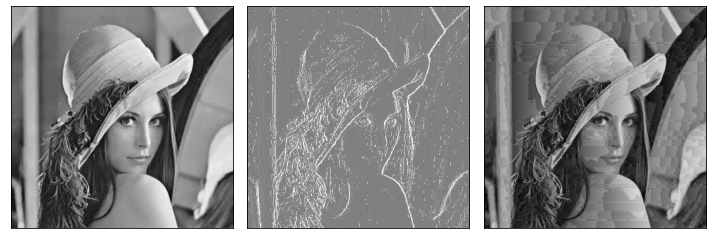

In [12]:
y_buffer = np.zeros((height * width), dtype=np.uint8)
y_buffer = grayImage.reshape(height * width)
d_buffer = np.zeros((height * width), dtype=np.uint8)
re_buffer = np.zeros((height * width), dtype=np.uint8)
dpcm(y_buffer, d_buffer, re_buffer, width, height, 4)
d_buffer = d_buffer.reshape(height, width)
re_buffer = re_buffer.reshape(height, width)

plt.figure(figsize=(10, 12))
plt.subplot(131), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(d_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(re_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#### 八位量化器

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15148\705373790.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = y_buffer[i * width + j] - prediction


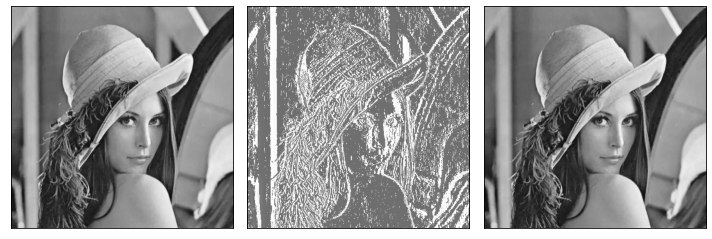

In [13]:
y_buffer = np.zeros((height * width), dtype=np.uint8)
y_buffer = grayImage.reshape(height * width)
d_buffer = np.zeros((height * width), dtype=np.uint8)
re_buffer = np.zeros((height * width), dtype=np.uint8)
dpcm(y_buffer, d_buffer, re_buffer, width, height, 8)
d_buffer = d_buffer.reshape(height, width)
re_buffer = re_buffer.reshape(height, width)

plt.figure(figsize=(10, 12))
plt.subplot(131), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(d_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(re_buffer, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()